<a href="https://colab.research.google.com/github/karencardiel/preprocessing-techniques/blob/main/project_unit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Cleaning for Gender Inequality Insights**

By Karen Cardiel and Elisabet Sulú


##**Steps:**

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

# Load the dataset (replace 'your_dataset.csv' with your actual file)
drive.mount("/content/drive/")
df = pd.read_csv("/content/drive/MyDrive/datasets/gender_inequality_index.csv", encoding='latin1')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,HDI rank,Country,HUMAN DEVELOPMENT,GII VALUE,GII RANK,Maternal_mortality,Adolescent_birth_rate,Seats_parliamentt(% held by women),F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,Unnamed: 12
0,1,Switzerland,VERY HIGH,0.018,3,5,2.2,39.8,96.9,97.5,61.7,72.7,NaN
1,2,Norway,VERY HIGH,0.016,2,2,2.3,45.0,99.1,99.3,60.3,72.0,NaN
2,3,Iceland,VERY HIGH,0.043,8,4,5.4,47.6,99.8,99.7,61.7,70.5,NaN
3,4,"Hong Kong, China (SAR)",VERY HIGH,..,..,..,1.6,..,77.1,83.4,53.5,65.8,NaN
4,5,Australia,VERY HIGH,0.073,19,6,8.1,37.9,94.6,94.4,61.1,70.5,NaN


In [ ]:
df.columns

Index(['HDI rank', 'Country', 'HUMAN DEVELOPMENT', 'GII VALUE', 'GII RANK',
       'Maternal_mortality', 'Adolescent_birth_rate',
       'Seats_parliamentt(% held by women)', 'F_secondary_educ',
       'M_secondary_educ', 'F_Labour_force', 'M_Labour_force', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df.drop("Unnamed: 12", axis=1, inplace = True)

In [ ]:
# Convert appropriate columns to numeric types (error coercion)
df['Maternal_mortality'] = pd.to_numeric(df['Maternal_mortality'], errors='coerce')
df['Adolescent_birth_rate'] = pd.to_numeric(df['Adolescent_birth_rate'], errors='coerce')
df['Seats_parliamentt(% held by women)'] = pd.to_numeric(df['Seats_parliamentt(% held by women)'], errors='coerce')
df['F_secondary_educ'] = pd.to_numeric(df['F_secondary_educ'], errors='coerce')
df['M_secondary_educ'] = pd.to_numeric(df['M_secondary_educ'], errors='coerce')
df['F_Labour_force'] = pd.to_numeric(df['F_Labour_force'], errors='coerce')
df['M_Labour_force'] = pd.to_numeric(df['M_Labour_force'], errors='coerce')

In [ ]:
# Basic data cleaning (replace '..' with NaN)
df.replace('..', np.nan, inplace=True)

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
#Elimination of duplicate data
df = df.drop_duplicates(subset=['HDI rank'])

In [ ]:
# 1. Create a new feature: maternal_to_adolescent ratio
df['maternal_to_adolescent'] = df['Maternal_mortality'] / df['Adolescent_birth_rate']

# 2. Bin the ratios into categories
bins = [0, 1, 5, 10, 20, 50, np.inf]
labels = ['0-1', '1-5', '5-10', '10-20', '20-50', '>50']
df['maternal_to_adolescent_binned'] = pd.cut(df['maternal_to_adolescent'], bins=bins, labels=labels)

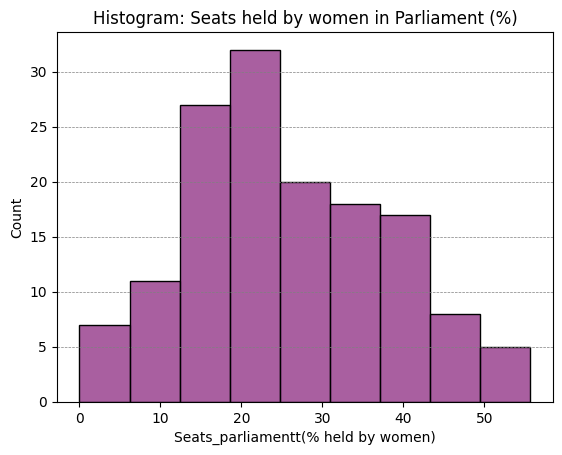

In [ ]:
# 1. Histogram of Seats held by women in Parliament
sns.histplot(df['Seats_parliamentt(% held by women)'], color = '#8C2981')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.title('Histogram: Seats held by women in Parliament (%)')
plt.show()  # Show plot

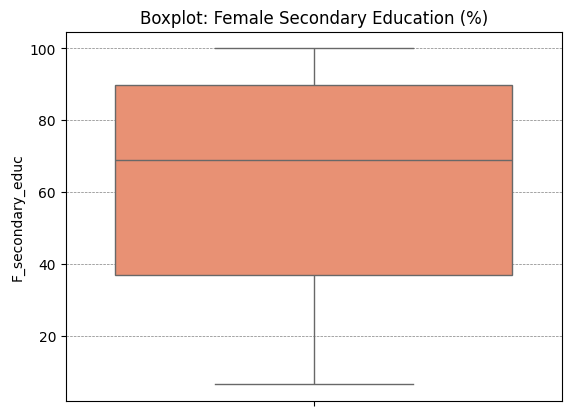

In [ ]:
# 2. Boxplot for F_secondary_educ
sns.boxplot(df['F_secondary_educ'], color = '#FB8761')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.title('Boxplot: Female Secondary Education (%)')
plt.show()  # Show plot

<ipython-input-76-e4f561d7b1af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='maternal_to_adolescent_binned', data=df, palette = "magma")


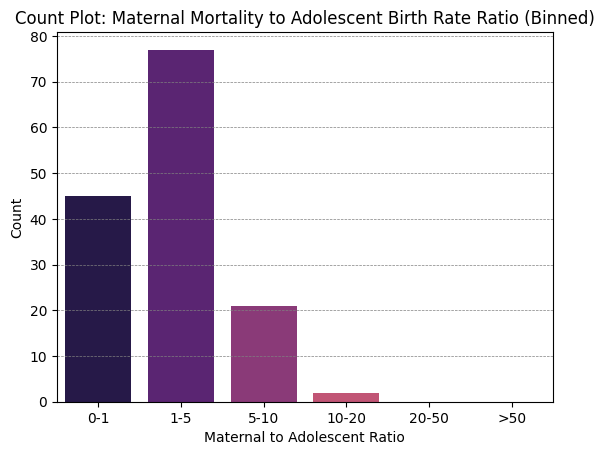

In [ ]:
# 3. Create a count plot for the binned ratio
sns.countplot(x='maternal_to_adolescent_binned', data=df, palette = "magma")
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.title('Count Plot: Maternal Mortality to Adolescent Birth Rate Ratio (Binned)')
plt.xlabel('Maternal to Adolescent Ratio')
plt.ylabel('Count')
plt.show()

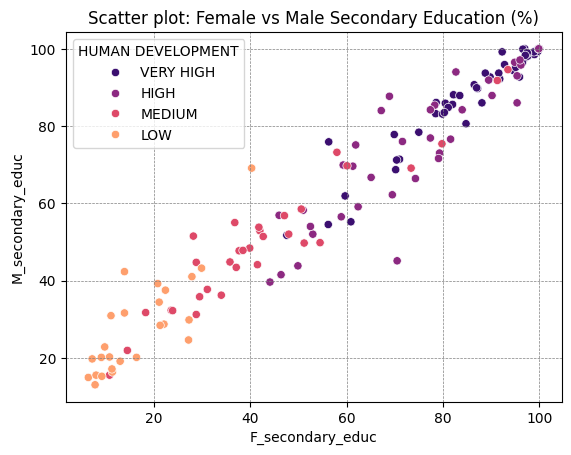

In [ ]:
# Bivariate analysis
# 4. Scatter plot between F_secondary_educ and M_secondary_educ
sns.scatterplot(x='F_secondary_educ', y='M_secondary_educ',  data=df, hue='HUMAN DEVELOPMENT', palette = "magma")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.title('Scatter plot: Female vs Male Secondary Education (%)')
plt.show()  # Show plot

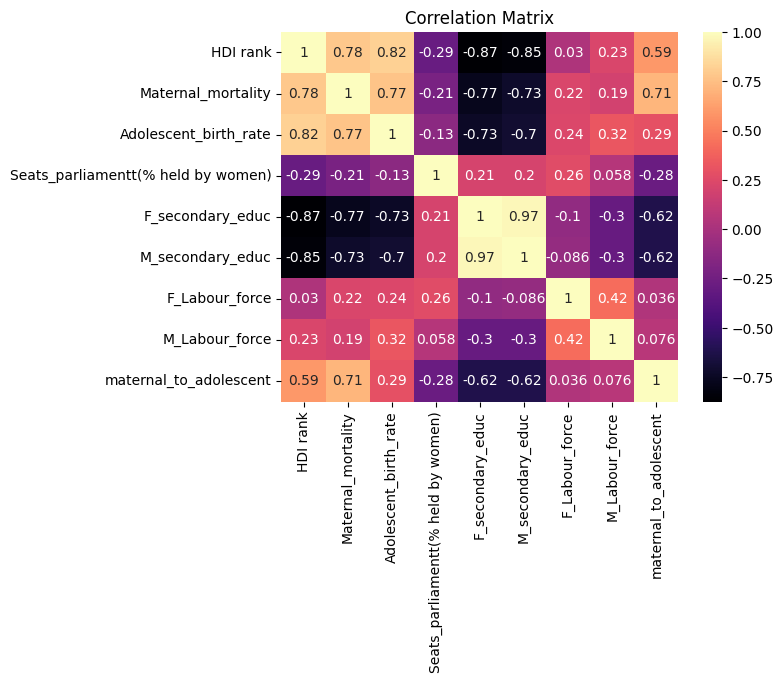

In [ ]:
# 5. Correlation matrix heatmap
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'magma')

plt.title('Correlation Matrix')
plt.show()  # Show plot

In [ ]:
# Save the preprocessed data
df.to_csv("/content/drive/MyDrive/datasets/gender_inequality_index_clean.csv", index=False)
df.head()

,HDI rank,Country,HUMAN DEVELOPMENT,GII VALUE,GII RANK,Maternal_mortality,Adolescent_birth_rate,Seats_parliamentt(% held by women),F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,maternal_to_adolescent,maternal_to_adolescent_binned
0,1,Switzerland,VERY HIGH,0.018,3,5.0,2.2,39.8,96.9,97.5,61.7,72.7,2.272727,1-5
1,2,Norway,VERY HIGH,0.016,2,2.0,2.3,45.0,99.1,99.3,60.3,72.0,0.869565,0-1
2,3,Iceland,VERY HIGH,0.043,8,4.0,5.4,47.6,99.8,99.7,61.7,70.5,0.740741,0-1
4,5,Australia,VERY HIGH,0.073,19,6.0,8.1,37.9,94.6,94.4,61.1,70.5,0.740741,0-1
5,6,Denmark,VERY HIGH,0.013,1,4.0,1.9,39.7,95.1,95.2,57.7,66.7,2.105263,1-5


In [ ]:
df.columns

Index(['HDI rank', 'Country', 'HUMAN DEVELOPMENT', 'GII VALUE', 'GII RANK',
       'Maternal_mortality', 'Adolescent_birth_rate',
       'Seats_parliamentt(% held by women)', 'F_secondary_educ',
       'M_secondary_educ', 'F_Labour_force', 'M_Labour_force',
       'maternal_to_adolescent', 'maternal_to_adolescent_binned'],
      dtype='object')